# Data Cleaning and Modelling

In [1]:
!pip install openpyxl

In [2]:
!pip install xgboost

In [3]:
!pip install shap

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import numpy as np
import sklearn

In [5]:
data = pd.read_excel('app_data.xlsx')
data

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.680000,16.900000,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.100000,31.900000,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.140000,23.300000,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.370000,20.600000,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.080000,16.900000,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,12.413415,25.250476,female,166.5,70.0,4.0,primary surgical,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
777,17.092402,20.429418,female,158.0,51.0,6.0,secondary surgical,complicated,appendicitis,appendicitis,...,Douglas,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN
778,14.992471,19.909972,female,152.0,46.0,4.0,primary surgical,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unauffällig
779,7.195072,14.295549,male,129.3,23.9,5.0,primary surgical,uncomplicated,appendicitis,appendicitis,...,NaN,no,NaN,yes,NaN,no,NaN,NaN,NaN,NaN


In [6]:
data = data.iloc[:,:39]

In [7]:
print(data.columns)

Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay', 'Management',
       'Severity', 'Diagnosis_Presumptive', 'Diagnosis', 'Alvarado_Score',
       'Paedriatic_Appendicitis_Score', 'Appendix_on_US', 'Appendix_Diameter',
       'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count',
       'Neutrophil_Percentage', 'Segmented_Neutrophils', 'Neutrophilia',
       'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count',
       'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'CRP', 'Dysuria',
       'Stool', 'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness',
       'US_Performed'],
      dtype='object')


In [8]:
data.isnull().sum()

Age                                   0
BMI                                  26
Sex                                   1
Height                               25
Weight                                2
Length_of_Stay                        3
Management                            0
Severity                              0
Diagnosis_Presumptive                 1
Diagnosis                             1
Alvarado_Score                       51
Paedriatic_Appendicitis_Score        51
Appendix_on_US                        4
Appendix_Diameter                   283
Migratory_Pain                        8
Lower_Right_Abd_Pain                  7
Contralateral_Rebound_Tenderness     14
Coughing_Pain                        15
Nausea                                7
Loss_of_Appetite                      9
Body_Temperature                      6
WBC_Count                             5
Neutrophil_Percentage               102
Segmented_Neutrophils               727
Neutrophilia                         49


In [9]:
data2 = data[['Age','BMI','Sex','Neutrophil_Percentage','WBC_Count','Neutrophilia','Ketones_in_Urine','Peritonitis','Lower_Right_Abd_Pain','Contralateral_Rebound_Tenderness','Ipsilateral_Rebound_Tenderness','Loss_of_Appetite','Body_Temperature','Diagnosis']]

In [10]:
ketone_map = {'no':0,'+':1,'++':2,'+++':3}
data2.loc[:,['Ketones_in_Urine']] = data2['Ketones_in_Urine'].map(ketone_map)
peritonitis_map = {'no':0, 'local':1, 'generalized':2}
data2.loc[:,['Peritonitis']] = data2['Peritonitis'].map(peritonitis_map)
diag_map = {'appendicitis':1,'no appendicitis':0}
data2['Diagnosis'] = data2['Diagnosis'].map(diag_map)
data2

C:\Users\Mahima Batheja\AppData\Local\Temp\ipykernel_14428\1796412032.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Diagnosis'] = data2['Diagnosis'].map(diag_map)


,Age,BMI,Sex,Neutrophil_Percentage,WBC_Count,Neutrophilia,Ketones_in_Urine,Peritonitis,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Ipsilateral_Rebound_Tenderness,Loss_of_Appetite,Body_Temperature,Diagnosis
0,12.680000,16.900000,female,68.2,7.7,no,2.0,0.0,yes,yes,no,yes,37.0,1.0
1,14.100000,31.900000,male,64.8,8.1,no,0.0,0.0,yes,yes,no,yes,36.9,0.0
2,14.140000,23.300000,female,74.8,13.2,no,0.0,0.0,yes,yes,no,no,36.6,0.0
3,16.370000,20.600000,female,63.0,11.4,no,0.0,0.0,yes,no,no,yes,36.0,0.0
4,11.080000,16.900000,female,44.0,8.1,no,0.0,0.0,yes,yes,no,yes,36.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,12.413415,25.250476,female,76.6,11.4,yes,NaN,1.0,yes,no,NaN,yes,39.4,1.0
777,17.092402,20.429418,female,89.2,17.4,yes,NaN,1.0,no,no,NaN,yes,37.8,1.0
778,14.992471,19.909972,female,68.5,14.6,no,0.0,0.0,yes,no,no,no,37.3,1.0
779,7.195072,14.295549,male,77.0,17.8,yes,3.0,1.0,yes,no,no,no,37.5,1.0


In [11]:
print(data2['Sex'].unique())
sex_map = {'female':0,'male':1}
data2['Sex'] = data2['Sex'].map(sex_map)
affirm_map = {'no':0,'yes':1}
cols = ['Neutrophilia','Lower_Right_Abd_Pain','Contralateral_Rebound_Tenderness','Ipsilateral_Rebound_Tenderness','Loss_of_Appetite']
data2[cols] = data2[cols].applymap(affirm_map.get)
print(data2['Sex'].head())
print(data2.dtypes)

['female' 'male' nan]
0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Sex, dtype: float64
Age                                 float64
BMI                                 float64
Sex                                 float64
Neutrophil_Percentage               float64
WBC_Count                           float64
Neutrophilia                        float64
Ketones_in_Urine                     object
Peritonitis                          object
Lower_Right_Abd_Pain                float64
Contralateral_Rebound_Tenderness    float64
Ipsilateral_Rebound_Tenderness      float64
Loss_of_Appetite                    float64
Body_Temperature                    float64
Diagnosis                           float64
dtype: object


C:\Users\Mahima Batheja\AppData\Local\Temp\ipykernel_14428\1681428522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Sex'] = data2['Sex'].map(sex_map)
C:\Users\Mahima Batheja\AppData\Local\Temp\ipykernel_14428\1681428522.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data2[cols] = data2[cols].applymap(affirm_map.get)
C:\Users\Mahima Batheja\AppData\Local\Temp\ipykernel_14428\1681428522.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[cols] = da

In [12]:
data2.isnull().sum()

Age                                   0
BMI                                  26
Sex                                   1
Neutrophil_Percentage               102
WBC_Count                             5
Neutrophilia                         49
Ketones_in_Urine                    199
Peritonitis                           8
Lower_Right_Abd_Pain                  7
Contralateral_Rebound_Tenderness     14
Ipsilateral_Rebound_Tenderness      162
Loss_of_Appetite                      9
Body_Temperature                      6
Diagnosis                             1
dtype: int64

In [13]:
data2

,Age,BMI,Sex,Neutrophil_Percentage,WBC_Count,Neutrophilia,Ketones_in_Urine,Peritonitis,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Ipsilateral_Rebound_Tenderness,Loss_of_Appetite,Body_Temperature,Diagnosis
0,12.680000,16.900000,0.0,68.2,7.7,0.0,2.0,0.0,1.0,1.0,0.0,1.0,37.0,1.0
1,14.100000,31.900000,1.0,64.8,8.1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,36.9,0.0
2,14.140000,23.300000,0.0,74.8,13.2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,36.6,0.0
3,16.370000,20.600000,0.0,63.0,11.4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,36.0,0.0
4,11.080000,16.900000,0.0,44.0,8.1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,36.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,12.413415,25.250476,0.0,76.6,11.4,1.0,NaN,1.0,1.0,0.0,NaN,1.0,39.4,1.0
777,17.092402,20.429418,0.0,89.2,17.4,1.0,NaN,1.0,0.0,0.0,NaN,1.0,37.8,1.0
778,14.992471,19.909972,0.0,68.5,14.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,37.3,1.0
779,7.195072,14.295549,1.0,77.0,17.8,1.0,3.0,1.0,1.0,0.0,0.0,0.0,37.5,1.0


In [14]:
data2.isnull().sum()

Age                                   0
BMI                                  26
Sex                                   1
Neutrophil_Percentage               102
WBC_Count                             5
Neutrophilia                         49
Ketones_in_Urine                    199
Peritonitis                           8
Lower_Right_Abd_Pain                  7
Contralateral_Rebound_Tenderness     14
Ipsilateral_Rebound_Tenderness      162
Loss_of_Appetite                      9
Body_Temperature                      6
Diagnosis                             1
dtype: int64

In [15]:
missing_pattern = data2.isnull().any(axis=1)
print(f"A total of {missing_pattern.sum()} patients had at least one record missing")

A total of 363 patients had at least one record missing


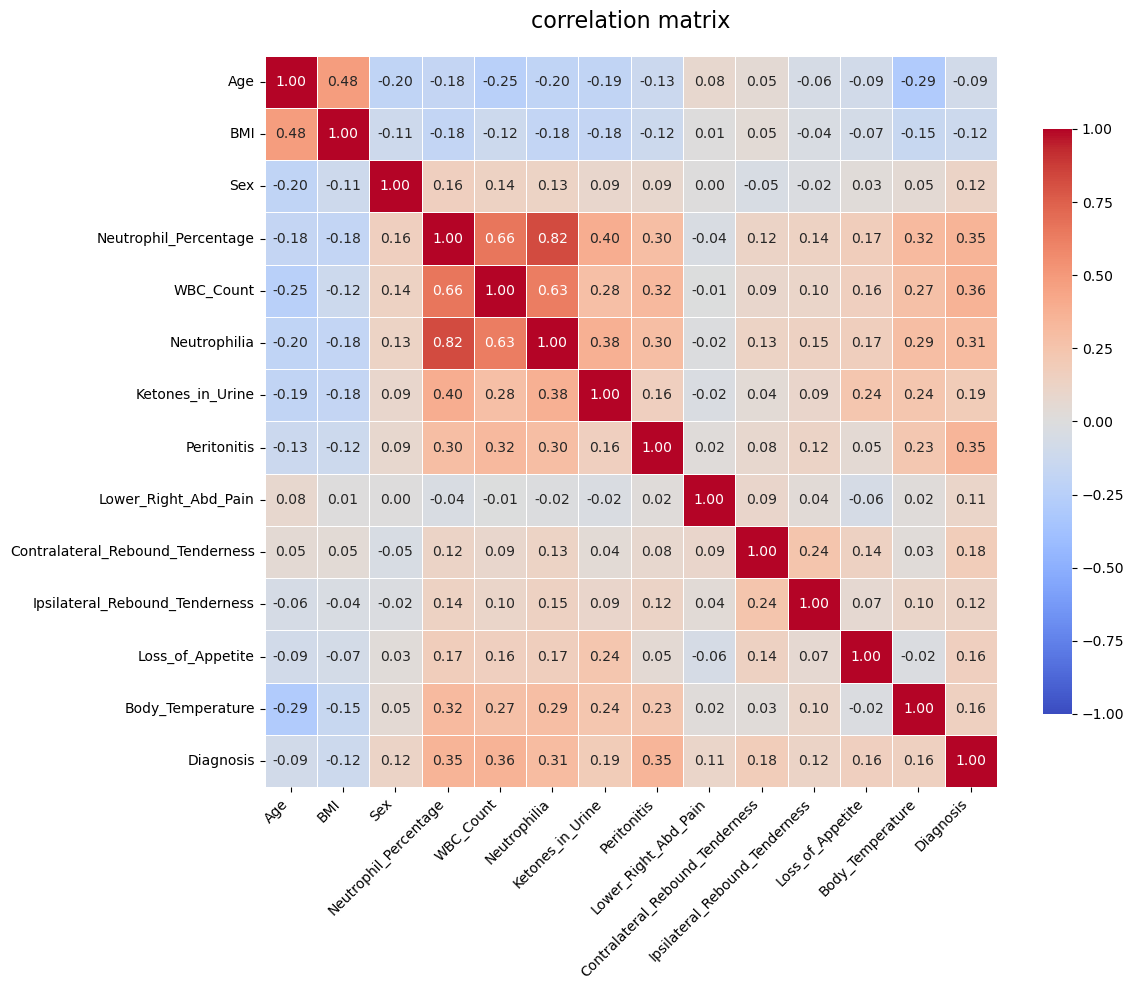

In [16]:
correlation = data2.corr()
plt.figure(figsize=(12,10))

heatmap = sns.heatmap(correlation,
                     annot=True,
                     fmt= ".2f",
                     cmap='coolwarm',
                     vmin=-1,
                     vmax=1,
                     center=0,
                     linewidths=.5,
                     cbar_kws={"shrink":0.8})

plt.title('correlation matrix', pad=20, fontsize=16)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

In [18]:
data2 = data2.dropna(subset=['Diagnosis'])
data2

,Age,BMI,Sex,Neutrophil_Percentage,WBC_Count,Neutrophilia,Ketones_in_Urine,Peritonitis,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Ipsilateral_Rebound_Tenderness,Loss_of_Appetite,Body_Temperature,Diagnosis
0,12.680000,16.900000,0.0,68.2,7.7,0.0,2.0,0.0,1.0,1.0,0.0,1.0,37.0,1.0
1,14.100000,31.900000,1.0,64.8,8.1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,36.9,0.0
2,14.140000,23.300000,0.0,74.8,13.2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,36.6,0.0
3,16.370000,20.600000,0.0,63.0,11.4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,36.0,0.0
4,11.080000,16.900000,0.0,44.0,8.1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,36.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,12.413415,25.250476,0.0,76.6,11.4,1.0,NaN,1.0,1.0,0.0,NaN,1.0,39.4,1.0
777,17.092402,20.429418,0.0,89.2,17.4,1.0,NaN,1.0,0.0,0.0,NaN,1.0,37.8,1.0
778,14.992471,19.909972,0.0,68.5,14.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,37.3,1.0
779,7.195072,14.295549,1.0,77.0,17.8,1.0,3.0,1.0,1.0,0.0,0.0,0.0,37.5,1.0


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
num_feature = ['Age', 'BMI', 'Neutrophil_Percentage',
    'WBC_Count', 'Body_Temperature']
cat_feature = ['Sex', 'Neutrophilia',
    'Peritonitis', 'Lower_Right_Abd_Pain',
    'Contralateral_Rebound_Tenderness',
    'Ipsilateral_Rebound_Tenderness','Ketones_in_Urine', 'Ipsilateral_Rebound_Tenderness',
    'Loss_of_Appetite']
preprocessor = ColumnTransformer([
    ('imputer',KNNImputer(n_neighbors=5)),
    ('num',StandardScaler(),num_feature),
    ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_feature)
],remainder='drop')

In [19]:
X = data2.drop(columns='Diagnosis')
y = data2['Diagnosis']
X

,Age,BMI,Sex,Neutrophil_Percentage,WBC_Count,Neutrophilia,Ketones_in_Urine,Peritonitis,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Ipsilateral_Rebound_Tenderness,Loss_of_Appetite,Body_Temperature
0,12.680000,16.900000,0.0,68.2,7.7,0.0,2.0,0.0,1.0,1.0,0.0,1.0,37.0
1,14.100000,31.900000,1.0,64.8,8.1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,36.9
2,14.140000,23.300000,0.0,74.8,13.2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,36.6
3,16.370000,20.600000,0.0,63.0,11.4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,36.0
4,11.080000,16.900000,0.0,44.0,8.1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,36.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,12.413415,25.250476,0.0,76.6,11.4,1.0,NaN,1.0,1.0,0.0,NaN,1.0,39.4
777,17.092402,20.429418,0.0,89.2,17.4,1.0,NaN,1.0,0.0,0.0,NaN,1.0,37.8
778,14.992471,19.909972,0.0,68.5,14.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,37.3
779,7.195072,14.295549,1.0,77.0,17.8,1.0,3.0,1.0,1.0,0.0,0.0,0.0,37.5


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
y_train

751    1.0
450    1.0
1      0.0
601    1.0
65     1.0
      ... 
61     0.0
234    0.0
279    0.0
259    0.0
706    1.0
Name: Diagnosis, Length: 624, dtype: float64

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from  matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

models = [
    ("Logistic Regression",LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting",GradientBoostingClassifier()),
    ("XGBoost",XGBClassifier())
]
best_rf_model = None #variable to store random forest pipeline

for name, model in models:
    pipeline = Pipeline([("preprocessor",preprocessor),
                         ("model",model)])
    pipeline.fit(X_train, y_train)
    param_distributions = {}
    if name == "Logistic Regression":
        param_distributions = {
            "model__C":[0.01,0.1,1,10],
            "model__penalty":["l1","l2"],
            "model__solver":["liblinear"]
        }
    elif name == "Random Forest":
        param_distributions = {
            "model__n_estimators":[100,200],
            "model__max_depth":[None, 10,20]
        }
    elif name =="Gradient Boosting":
        param_distributions = {
            "model__n_estimators":[100,200],
            "model__learning_rate":[0.01,0.1],
            "model__max_depth":[3,4,5]
        }
    elif name =="XGBoost":
        param_distributions = {
            "model__max_depth":[3,4,5],
            "model__learning_rate":[0.01,0.1]
        }
    randomized_search = RandomizedSearchCV(
        pipeline,
        param_distributions,
        # n_iter= 20,
        cv=3,
        scoring="roc_auc",
        verbose=3,
        n_jobs=3
    )
    randomized_search.fit(X_train,y_train)
    best_model = randomized_search.best_estimator_
    y_pred = best_model.predict(X_val)
    if name == "Random Forest":
        best_rf_model = best_model
    print("Model:",name)
    print("Best parameters:",randomized_search.best_params_)
    print("Accuracy:",accuracy_score(y_val,y_pred))
    print("Classification report:\n",classification_report(y_val,y_pred))
    cm = confusion_matrix(y_val, y_pred)
    labels = ['Class 0', 'Class 1']
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    if hasattr(best_model.named_steps["model"], "predict_proba"):
        y_pred_proba = best_model.predict_proba(X_val)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
        roc_auc = roc_auc_score(y_val, y_pred_proba)

        plt.figure(figsize=(8, 6))
        plt.plot(
            fpr, tpr, color="blue", lw=2, label="ROC curve (area = %0.2f)" % roc_auc
        )
        plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend(loc="lower right")
        plt.show()


ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
#sensitivity analysis with SHAP values
#Extract the fitted model and preprocessor
rf = best_rf_model.named_steps["model"]
pre = best_rf_model.named_steps["preprocessor"]

#Transform X_val using fitted preprocessor
X_val_transformed = pre.transform(X_val)

#Get correct feature names from fitted preprocessor
feature_names = pre.get_feature_names_out()

#Create SHAP explainer on model
explainer = shap.TreeExplainer(rf)

#Compute SHAP values
shap_values = explainer.shap_values(X_val_transformed)

#Use shap_values[1] only if it's a list (i.e., for classification)
if isinstance(shap_values, list):
    shap_values = shap_values[1]

#Plot summary
shap.summary_plot(shap_values, X_val_transformed, feature_names=feature_names)

In [ ]:

# Extract preprocessor and ensure it's fitted
pre = best_rf_model.named_steps["preprocessor"]
pre.fit(X_train)

# Transform X_val with only the fitted preprocessor
X_val_transformed = pre.transform(X_val)

# Get proper feature names
feature_names = pre.get_feature_names_out()

# SHAP explainer and value computation
rf_model = best_rf_model.named_steps["model"]
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_val_transformed)

# Use shap_values[1] if it's a classifier
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# Sanity check
print("SHAP shape:", shap_values.shape)
print("Transformed X shape:", X_val_transformed.shape)
print("Feature names length:", len(feature_names))

# Plot
shap.summary_plot(shap_values, X_val_transformed, feature_names=feature_names)

In [ ]:
print(type(X_val_transformed))
print(X_val_transformed[:5])

In [ ]:
all_cols = set(X_val.columns)
used_cols = set(num_feature + cat_feature)

missing_cols = all_cols - used_cols
print("Missing columns in preprocessing:", missing_cols)

In [ ]:
print(pre.get_feature_names_out())

In [ ]:
# Convert list of class-wise SHAP arrays into mean absolute values
import numpy as np

shap_values_mean = np.mean(np.abs(shap_values), axis=2)  # shape (84, 12)

# Plot summary using mean SHAP values
shap.summary_plot(shap_values_mean, X_val_transformed, feature_names=feature_names)